## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
print(mouse_metadata.count())
print(study_results.count())

study_data = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how="outer")

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64
Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64


In [2]:
mouse_count = study_data["Mouse ID"].nunique()
mouse_count

# Checking the number of mice in the DataFrame.


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = study_data.loc[study_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
#duplicate_mouse=study_data.loc[study_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_info = study_data.loc[study_data['Mouse ID'] == 'g989']
mouse_info

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a cleanDataFrame by dropping the duplicate mouse by its ID.
cleaned_data = study_data[study_data['Mouse ID'].isin(duplicate_mouse)== False]
#mouse_df.head()

In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_data['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


mean= cleaned_data.groupby(['Drug Regimen']).mean()
median = cleaned_data.groupby(['Drug Regimen']).median()
variance = cleaned_data.groupby(['Drug Regimen']).var()
stanDev = cleaned_data.groupby(['Drug Regimen']).std()
sem = cleaned_data.groupby(['Drug Regimen']).sem()


stat_summary = pd.DataFrame({"Mean":mean['Tumor Volume (mm3)'], 
                             "Median": median['Tumor Volume (mm3)'], 
                             "Variance": variance['Tumor Volume (mm3)'], 
                             "Standard Deviation": stanDev['Tumor Volume (mm3)'] , 
                             "SEM": sem['Tumor Volume (mm3)']})
stat_summary

# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_by = cleaned_data.groupby('Drug Regimen')
quick_stats = grouped_by['Tumor Volume (mm3)'].agg(["mean",'median','var','std','sem'])


# This method produces everything in a single groupby function.

## Bar Plots

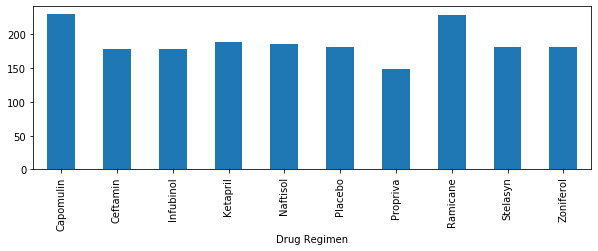

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
mice_per_time = cleaned_data.groupby('Drug Regimen').count()

mice_per_time['Mouse ID'].plot(kind="bar", figsize=(10,3))








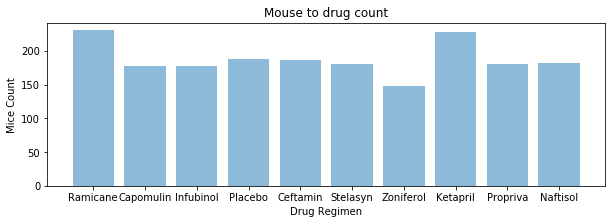

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

x = cleaned_data['Drug Regimen'].unique()
y = cleaned_data.groupby(['Drug Regimen']).count()
y_pos = np.arange(len(x))
y = y['Tumor Volume (mm3)']

plt.figure(figsize=(10,3))
plt.xticks(y_pos, x)
plt.ylabel('Mice Count')
plt.xlabel('Drug Regimen')
plt.title('Mouse to drug count')

plt.bar(y_pos, y, align='center', alpha=0.5)



plt.show()



## Pie Plots

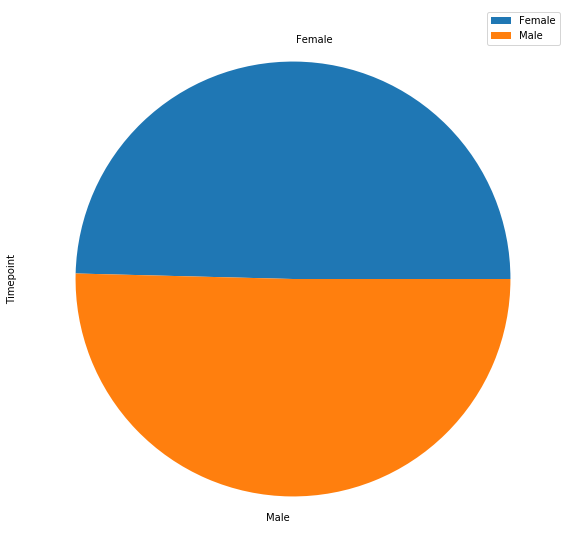

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_mice = cleaned_data.groupby(['Mouse ID','Sex']).count()

mice_sex = sex_mice.groupby('Sex').count()

#mice_per_time['Timepoint'].plot(kind="pie", figsize=(10,3))
mice_sex.plot.pie(y='Timepoint', figsize=(100,10))


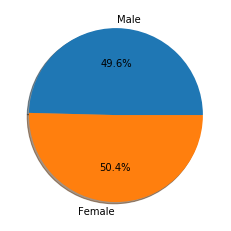

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
by_sex = sex_mice.groupby('Sex').count()


labels = cleaned_data['Sex'].unique()
sizes = by_sex['Timepoint']
plt.pie(sizes, labels = labels,autopct='%1.1f%%',
        shadow=True, startangle=0)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
#mah_drugs = cleaned_data.groupby(['Drug Regimen']).count()

In [14]:
play_with = cleaned_data[['Mouse ID','Timepoint','Drug Regimen','Tumor Volume (mm3)']]
group_play = play_with.groupby('Mouse ID')
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
saved_mission = group_play.max()
saved_mission[saved_mission['Drug Regimen'].loc[:].isin(drugs)]

,Timepoint,Drug Regimen,Tumor Volume (mm3)
Mouse ID,,,
a203,45,Infubinol,67.973419
a251,45,Infubinol,65.525743
a275,45,Ceftamin,62.999356
a411,45,Ramicane,45.466677
a444,45,Ramicane,45.000000
...,...,...,...
y769,45,Ceftamin,68.594745
y793,45,Capomulin,45.000000
y865,45,Ceftamin,64.729837


In [15]:
tumor_list = []
for mouse in group_play.groups.keys():
    holder = (group_play.get_group(mouse))
    tumor_list.append(holder.loc[(holder['Timepoint']==holder['Timepoint'].max())])

best_drugs = pd.concat(tumor_list)

In [16]:
len(tumor_list) == len(group_play.groups.keys())

True

In [17]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

Capomulin = [] 
Ramicane = []
Infubinol = []
Ceftamin = []

drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


for i in range(len(best_drugs['Drug Regimen'])):
    if best_drugs['Drug Regimen'].iloc[i] == 'Ramicane':
        Ramicane.append(best_drugs['Tumor Volume (mm3)'].iloc[i])
    elif best_drugs['Drug Regimen'].iloc[i] == 'Capomulin':
        Capomulin.append(best_drugs['Tumor Volume (mm3)'].iloc[i])
    elif best_drugs['Drug Regimen'].iloc[i] == 'Infubinol':
        Infubinol.append(best_drugs['Tumor Volume (mm3)'].iloc[i])
    elif best_drugs['Drug Regimen'].iloc[i] == 'Ceftamin':
        Ceftamin.append(best_drugs['Tumor Volume (mm3)'].iloc[i])



In [18]:
drug_lists = {"Capomulin" : Capomulin,'Ramicane' : Ramicane,'Infubinol' : Infubinol,"Ceftamin" :Ceftamin}



#drug_df = pd.DataFrame({"Capomulin" : Capomulin,'Ramicane' : Ramicane,'Infubinol' : Infubinol,"Ceftamin" :Ceftamin})
df = pd.DataFrame.from_dict(drug_lists, orient='index')
drug_df = df.transpose() 

quartiles = drug_df.quantile([.25,.5,.75])
lowerq = quartiles.loc[.25]
upperq = quartiles.loc[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

d0 = drug_df[(drug_df[[drugs[0]]] < lower_bound[0]) | (drug_df[[drugs[0]]] < upper_bound[0])][drugs[0]]
d1 = drug_df[(drug_df[[drugs[1]]] < lower_bound[1]) | (drug_df[[drugs[1]]] < upper_bound[1])][drugs[1]]
d2 = drug_df[(drug_df[[drugs[2]]] < lower_bound[2]) | (drug_df[[drugs[2]]] < upper_bound[2])][drugs[2]]
d3 = drug_df[(drug_df[[drugs[3]]] < lower_bound[3]) | (drug_df[[drugs[3]]] < upper_bound[3])][drugs[3]]


df = pd.DataFrame({'Capomulin':d0,
                  'Ramicane':d1,
                  'Infubinol':d2,
                  'Ceftamin':d3})


In [37]:
drugs


tester_list = {'Capomulin':None,
                  'Ramicane':None,
                  'Infubinol':None,
                  'Ceftamin':None}
for i in range(len(drugs)):
    temp = drug_df[(drug_df[[drugs[i]]] < lower_bound[i]) | (drug_df[[drugs[i]]] < upper_bound[i])][drugs[i]]
    tester_list[drugs[i]] = temp
    #if i == 0:
    #    tester_list['Capomulin'] = temp
    #elif i == 1:
    #    tester_list['Ramicane'] = temp
    #elif i == 2:
    #    tester_list['Infubinol'] = temp
    #elif i == 3:
    #    tester_list['Ceftamin'] = temp
    

In [38]:
tester_df = pd.DataFrame(tester_list)
tester_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


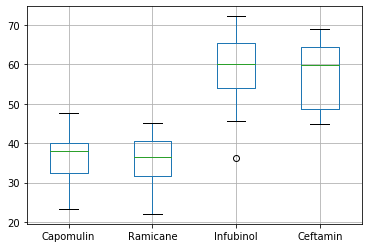

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


boxplot = df.boxplot(column=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])


## Line and Scatter Plots

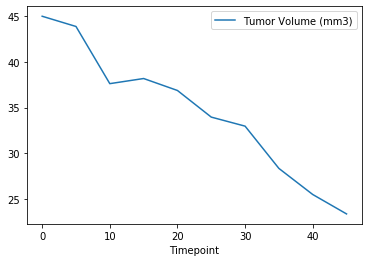

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#df.plot.scatter(x='length',
                     # y='width',
                      #c='DarkBlue')



cap_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

subject = cap_data[cap_data['Mouse ID']=='s185']
subject = subject[['Timepoint','Tumor Volume (mm3)']]
subject.plot.line(x='Timepoint')

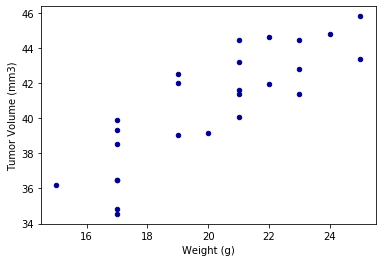

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

cap_data.groupby('Mouse ID').mean().plot.scatter(x='Weight (g)',
                      y='Tumor Volume (mm3)',
                      c='DarkBlue')
grouped_scatter = cap_data.groupby('Mouse ID').mean()

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


x = grouped_scatter['Weight (g)'].iloc[:]
y = grouped_scatter['Tumor Volume (mm3)'].iloc[:]
correlation= st.pearsonr(x,y)
round(correlation[0],2)

0.84

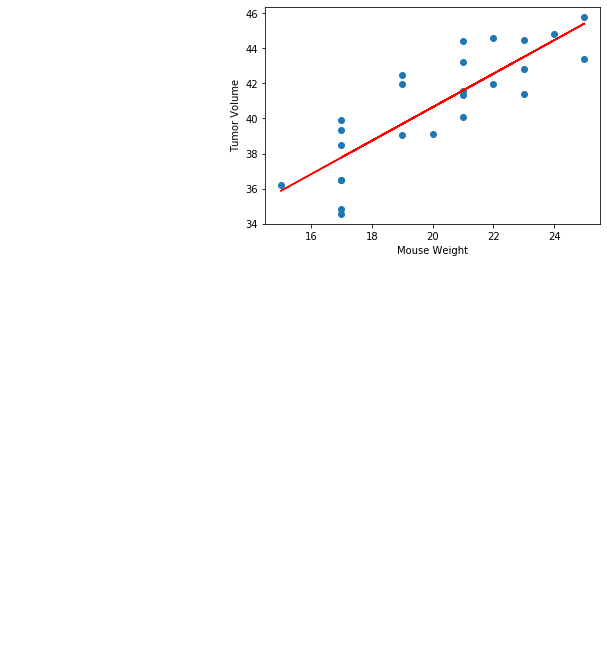

In [23]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.show()


